# Hierarchical Clustering

#### Load the packages and import the data

In [19]:
import pandas as pd
import numpy as np
data = pd.read_csv("./Data Files/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

#### Subset the data into X

In [21]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#### Center and Scale X

In [22]:
X_scaled = (X - X.mean()) / X.std()

#### Fit the Hierarchical Clustering Model and use the Dendrogram to determine the optimal number of clusters

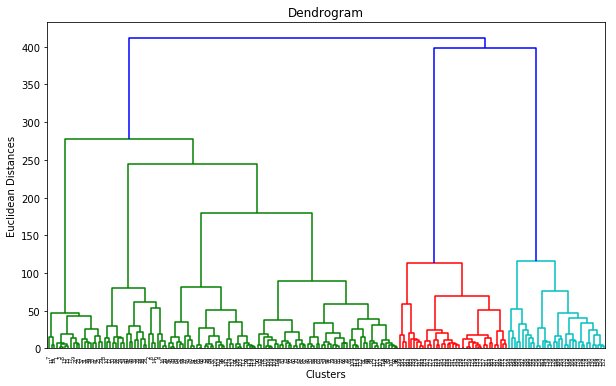

In [23]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))

dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Euclidean Distances")

#### Fit and evaluate new model using the new "optimal" number of clusters obtained from analyzing the Dendrogram

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc_model = AgglomerativeClustering(n_clusters = 5,  # Tune this parameter using plot above
                                   affinity = "euclidean", linkage = "ward")
cluster_pred = hc_model.fit_predict(X)

#### Assign each observation to a cluster

In [25]:
pred_summary = X.copy()
pred_summary["cluster"] = cluster_pred
pred_summary.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
